<a href="https://colab.research.google.com/github/kalopez0621/Portfolio/blob/main/Natural%20Language%20Processing%20Projects%20/NLP_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import pandas as pd # data manipulation
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold


# Data Loading
 Load the datasets for fake and real news articles that were downloaded from Google Drive but dataset is from Kaggle

In [ ]:
# Loading the datasets from Google Drive
fake_url = "https://drive.google.com/uc?id=1IDxrB9Zr_laQQqYAr2h2VKHcAfRzaN4c"  # Fake news
real_url = "https://drive.google.com/uc?id=1P98NMVFFUzDQipuIh5UVLEQ3hbYm4X_g"  # Real news

# Read the CSV files
fake_df = pd.read_csv(fake_url, encoding='utf-8', on_bad_lines='skip')  # Skips bad lines
real_df = pd.read_csv(real_url, encoding='utf-8', on_bad_lines='skip')  # Skips bad lines

# Displaying the first few rows of each dataset
print("Fake News Dataset:")
print(fake_df.head())

print("\nReal News Dataset:")
print(real_df.head())

Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

Real News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans fl

# Data Preprocessing

In [ ]:
# Cleaning up column names
fake_df.columns = fake_df.columns.str.strip()
real_df.columns = real_df.columns.str.strip()

# Renaming columns for consistency
fake_df.rename(columns={'title ': 'title', 'text subject ': 'text_subject', 'date ': 'date'}, inplace=True)
real_df.rename(columns={'title ': 'title', 'text subject ': 'text_subject', 'date ': 'date'}, inplace=True)

# Convert date columns to datetime format
fake_df['date'] = pd.to_datetime(fake_df['date'], errors='coerce')
real_df['date'] = pd.to_datetime(real_df['date'], errors='coerce')

# Displaying the first few rows of each dataset
print("Fake News Dataset:")
print(fake_df.head())

print("\nReal News Dataset:")
print(real_df.head())

Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  
0  Donald Trump just couldn t wish all Americans ...    News 2017-12-31  
1  House Intelligence Committee Chairman Devin Nu...    News 2017-12-31  
2  On Friday, it was revealed that former Milwauk...    News 2017-12-30  
3  On Christmas day, Donald Trump announced that ...    News 2017-12-29  
4  Pope Francis used his annual Christmas Day mes...    News 2017-12-25  

Real News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.

In [ ]:
# Handling missing values
fake_df.dropna(subset=['text'], inplace=True)
real_df.dropna(subset=['text'], inplace=True)

In [ ]:
# Creating random sentiment for demonstration purposes
np.random.seed(0)
fake_df['Sentiment'] = np.random.choice(['Positive', 'Negative', 'Neutral'], size=len(fake_df))
real_df['Sentiment'] = np.random.choice(['Positive', 'Negative', 'Neutral'], size=len(real_df))

# Convert sentiment to binary format
fake_df['Sentiment'] = fake_df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0})
real_df['Sentiment'] = real_df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 0})

# Display the updated datasets
print("Updated Fake News Dataset:")
print(fake_df.head())

print("\nUpdated Real News Dataset:")
print(real_df.head())

Updated Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  \
0  Donald Trump just couldn t wish all Americans ...    News 2017-12-31   
1  House Intelligence Committee Chairman Devin Nu...    News 2017-12-31   
2  On Friday, it was revealed that former Milwauk...    News 2017-12-30   
3  On Christmas day, Donald Trump announced that ...    News 2017-12-29   
4  Pope Francis used his annual Christmas Day mes...    News 2017-12-25   

   Sentiment  
0          1  
1          0  
2          1  
3          0  
4          0  

Updated Real News Dataset:
                                               title  \
0  As U.S. 

In [ ]:
# Cleaning the text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

# Applying the cleaning function to the 'text' column of both datasets
fake_df['text'] = fake_df['text'].apply(clean_text)
real_df['text'] = real_df['text'].apply(clean_text)

# Displaying the first few rows of the cleaned datasets
print("Cleaned Fake News Dataset:")
print(fake_df.head())

print("\nCleaned Real News Dataset:")
print(real_df.head())

Cleaned Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  \
0  donald trump just couldn t wish all americans ...    News 2017-12-31   
1  house intelligence committee chairman devin nu...    News 2017-12-31   
2  on friday it was revealed that former milwauke...    News 2017-12-30   
3  on christmas day donald trump announced that h...    News 2017-12-29   
4  pope francis used his annual christmas day mes...    News 2017-12-25   

   Sentiment  
0          1  
1          0  
2          1  
3          0  
4          0  

Cleaned Real News Dataset:
                                               title  \
0  As U.S. 

In [ ]:
# Combining the datasets
combined_df = pd.concat([fake_df.assign(label='fake'), real_df.assign(label='real')])

combined_df.head()

,title,text,subject,date,Sentiment,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,2017-12-31,1,fake
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,fake
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,2017-12-30,1,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,2017-12-29,0,fake
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,fake


# Text Vectorization with TF-IDF

In [ ]:
# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Transforming the text data
X_tfidf = tfidf_vectorizer.fit_transform(combined_df['text'])
y = combined_df['label'].map({'fake': 0, 'real': 1})  # Convert to binary


# Splitting the Data

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Displaying the shape of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (35918, 5000)
Test set shape: (8980, 5000)


In [ ]:
# Define the function for plotting confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks(ticks=[0.5, 1.5])
    ax.set_xticklabels(['Fake', 'Real'])
    ax.set_yticks(ticks=[0.5, 1.5])
    ax.set_yticklabels(['Fake', 'Real'], rotation=0)


# Logistic Regression

In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



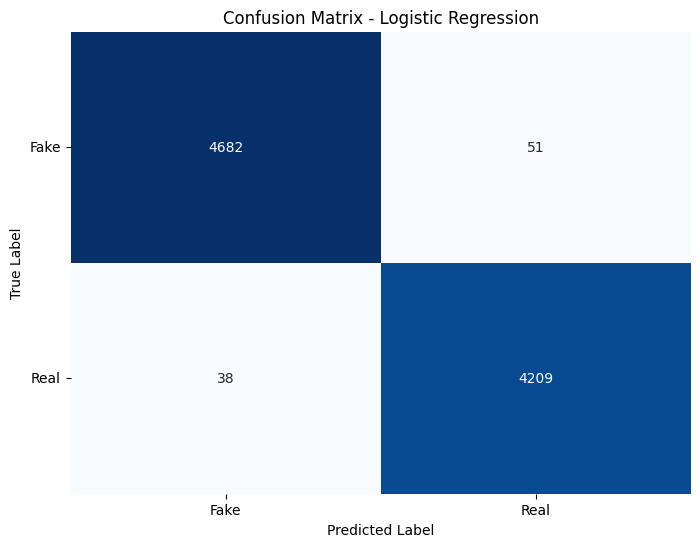

In [ ]:

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression", plt.gca())  # Pass the current axis
plt.show()

# Support Vector Machine (SVM)

In [ ]:
# SVM Model - takes 7 minutes
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



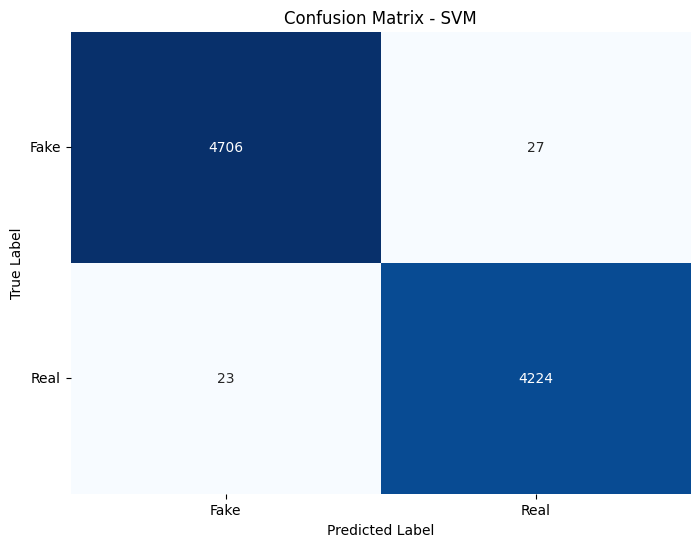

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_test, y_pred_svm, "SVM", plt.gca())  # Pass the current axis
plt.show()

# XGBoost

In [ ]:
# XGBoost Model
xgb_model = XGBClassifier(eval_metric='logloss')  # Remove use_label_encoder
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



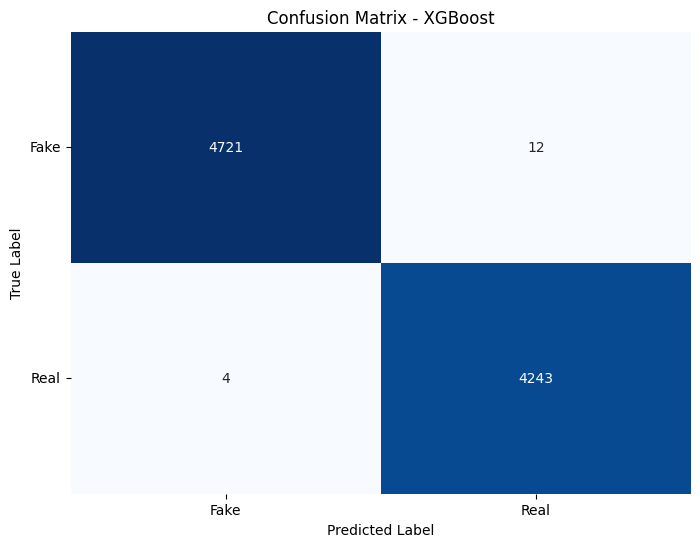

In [ ]:

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost", plt.gca())  # Pass the current axis
plt.show()

# Confusion Matrices

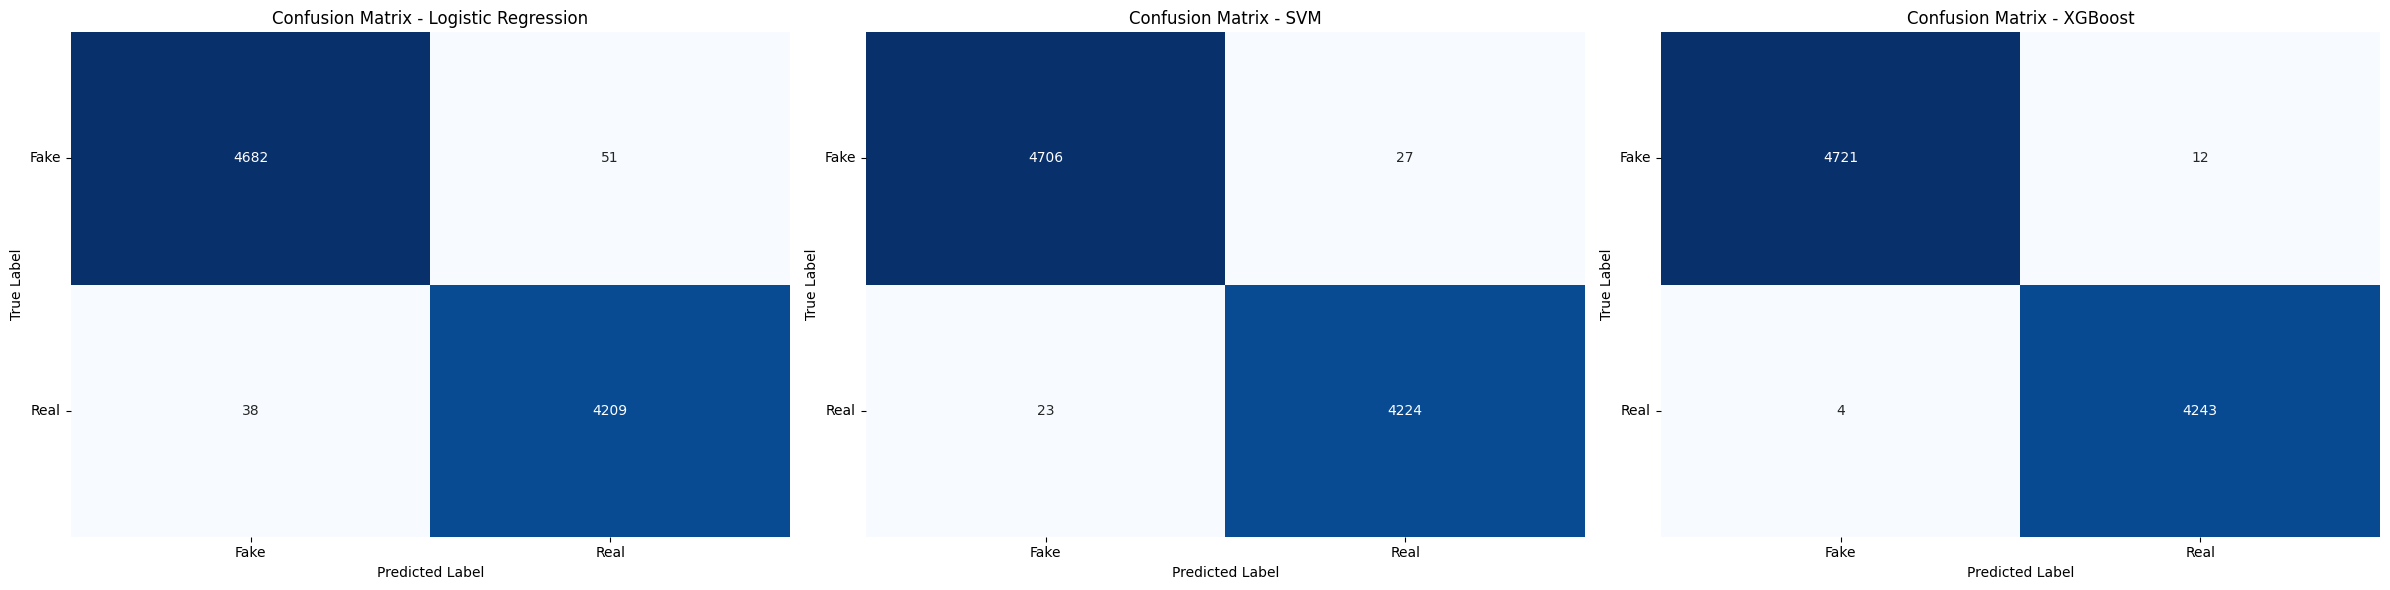

In [ ]:
# Plotting confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression", axes[0])
plot_confusion_matrix(y_test, y_pred_svm, "SVM", axes[1])
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost", axes[2])
plt.tight_layout()
plt.show()


# Enhancing Visualizations

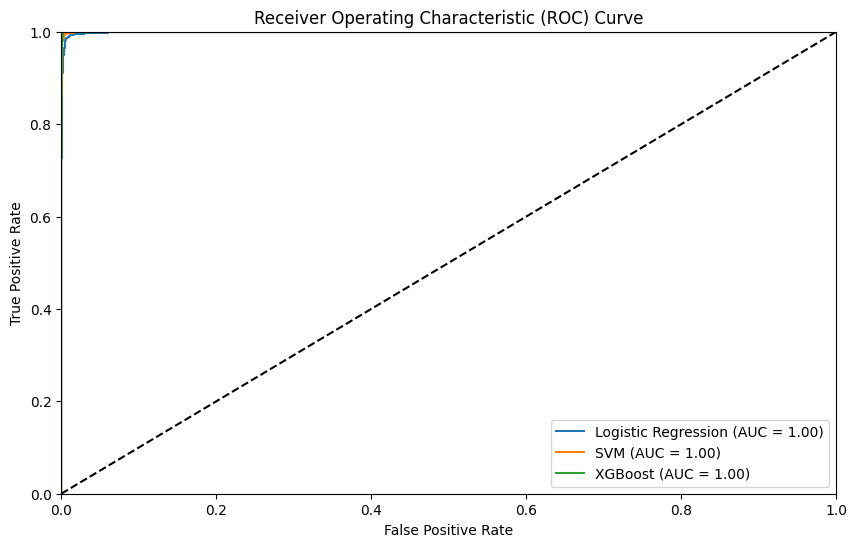

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Get predicted probabilities for each model
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_prob_svm = svm_model.decision_function(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Plot ROC curves
plt.figure(figsize=(10, 6))
plot_roc_curve(y_test, y_pred_prob_lr, "Logistic Regression")
plot_roc_curve(y_test, y_pred_prob_svm, "SVM")
plot_roc_curve(y_test, y_pred_prob_xgb, "XGBoost")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Cross-Validations

In [ ]:
# Cross-validation for Logistic Regression
scores_lr = cross_val_score(lr_model, X_tfidf, y, cv=3)  # Use 3 folds

print("Logistic Regression CV Scores:", scores_lr)

Logistic Regression CV Scores: [0.97848457 0.96558867 0.97761593]


In [ ]:
# Cross-validation for SVM 31 minutes
# scores_svm = cross_val_score(svm_model, X_tfidf, y, cv=5)
# print("SVM CV Scores:", scores_svm)

In [ ]:
# Cross-Validation for SVM with reduced folds and parallel processing 9 minutes

skf = StratifiedKFold(n_splits=3)  # Use 3 folds
scores_svm = cross_val_score(svm_model, X_tfidf, y, cv=skf, n_jobs=-1)  # Parallel processing
print("SVM CV Scores:", scores_svm)

SVM CV Scores: [0.99044501 0.98536683 0.98917546]


# Feature Importance

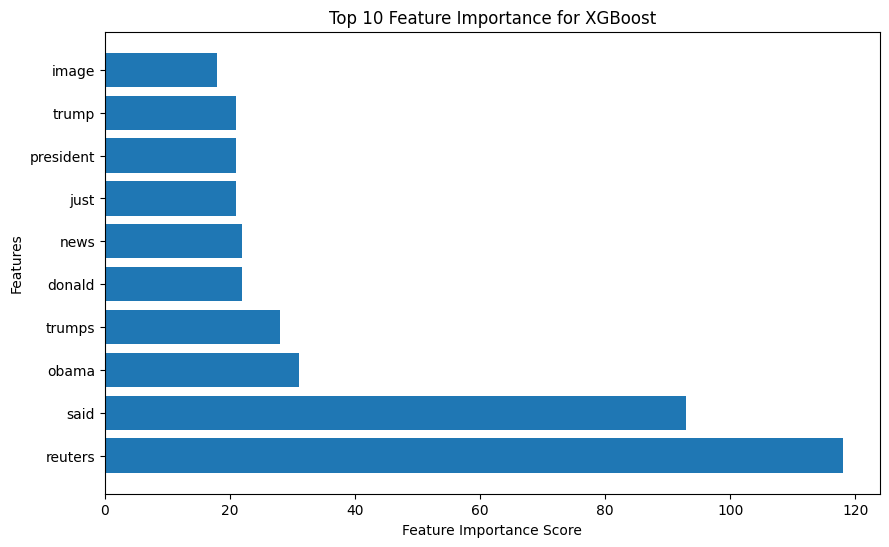

In [ ]:
# Feature Importance Visualization
xgb_plot_importance = xgb_model.get_booster().get_score(importance_type='weight')
sorted_importance = sorted(xgb_plot_importance.items(), key=lambda x: x[1], reverse=True)

# Prepare data for plotting
features, scores = zip(*sorted_importance[:10])  # Top 10 features

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Map feature indices to names
feature_labels = [feature_names[int(f[1:])] for f in features]  # Convert to actual feature names

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_labels, scores)  # Use actual feature names
plt.title('Top 10 Feature Importance for XGBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


# Model Comparison Table

In [ ]:
# Create a summary DataFrame
performance_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_xgb)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_xgb)]
})

print(performance_df)


                 Model  Accuracy  F1 Score
0  Logistic Regression  0.990089  0.989538
1                  SVM  0.994432  0.994116
2              XGBoost  0.998218  0.998118
